# About Dataset

**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Data Cleaning

In [21]:
import pandas as pd
import numpy as np

In [22]:
raw_df = pd.read_csv('./data/credit_card_clients.csv')
raw_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [23]:
# Encoding Categoriacal Values
# Gender (1 = male, 2 = female) > (0 = male, 1 = female)
raw_df['X2'] = np.where(raw_df['X2'] == 1, 0 , 1)
raw_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,0,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,0,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,0,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
# export DataFrame to csv file
raw_df.to_csv('./data/credit_card_clients_cleaning.csv', index=False)

# Non-spark

## Import Dataset

In [25]:
raw_df = pd.read_csv('./data/credit_card_clients_cleaning.csv')
raw_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,1,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,0,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,0,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,0,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,0,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Data Preparation

In [26]:
raw_df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

X = raw_df.drop(columns=['ID', 'Y'])
y = raw_df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Models

### w/o feature selection

----- RandomForestClassifier -----
Iteration: 1
Model Training Time in Seconds: 4.53
Model Prediction Time in Seconds: 0.09
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5231
           1       0.38      0.65      0.48       769

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.87      0.82      0.84      6000



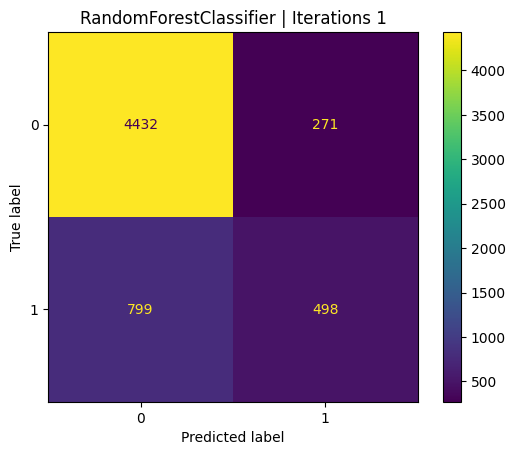

Iteration: 2
Model Training Time in Seconds: 4.50
Model Prediction Time in Seconds: 0.09
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5231
           1       0.38      0.65      0.48       769

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.87      0.82      0.84      6000



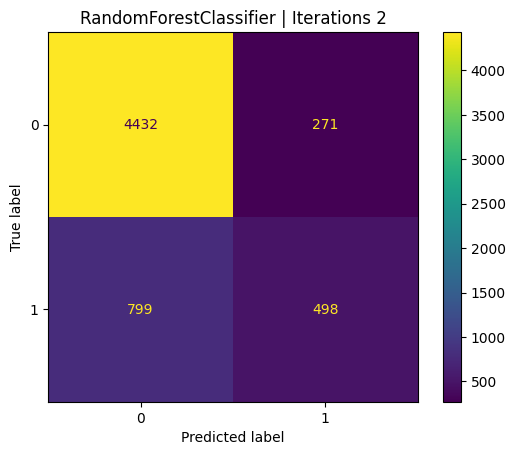

Iteration: 3
Model Training Time in Seconds: 4.52
Model Prediction Time in Seconds: 0.10
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5231
           1       0.38      0.65      0.48       769

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.87      0.82      0.84      6000



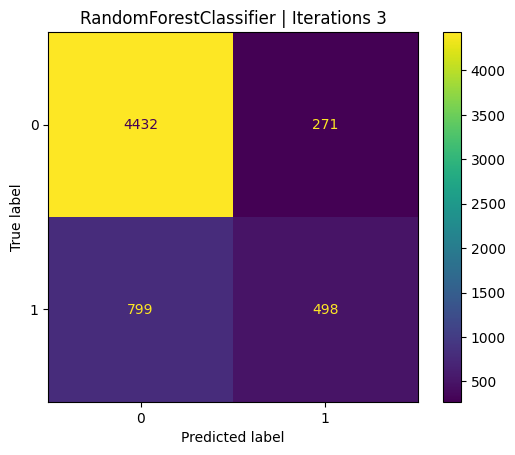

Iteration: 4
Model Training Time in Seconds: 4.77
Model Prediction Time in Seconds: 0.09
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5231
           1       0.38      0.65      0.48       769

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.87      0.82      0.84      6000



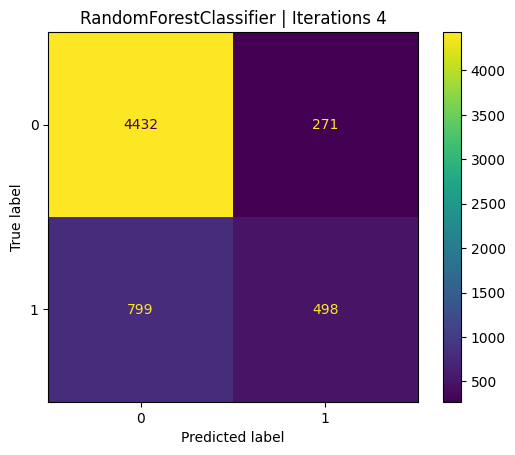

Iteration: 5
Model Training Time in Seconds: 4.70
Model Prediction Time in Seconds: 0.09
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5231
           1       0.38      0.65      0.48       769

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.87      0.82      0.84      6000



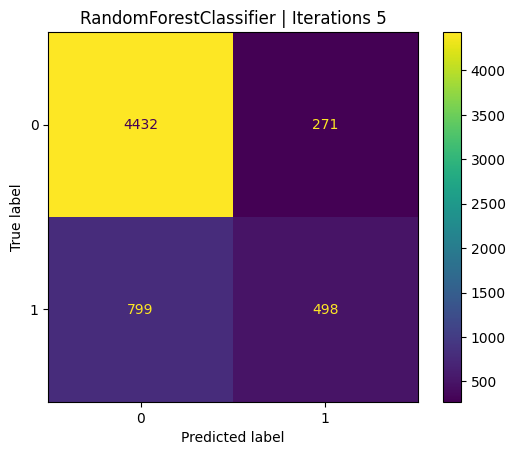

----- DecisionTreeClassifier -----
Iteration: 1
Model Training Time in Seconds: 0.38
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4609
           1       0.43      0.40      0.41      1391

    accuracy                           0.74      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.73      0.74      0.73      6000



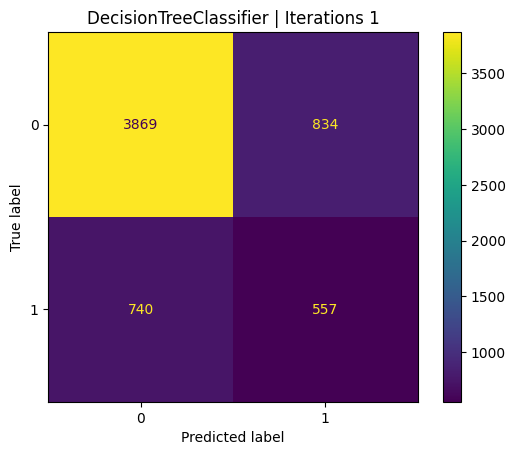

Iteration: 2
Model Training Time in Seconds: 0.38
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4609
           1       0.43      0.40      0.41      1391

    accuracy                           0.74      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.73      0.74      0.73      6000



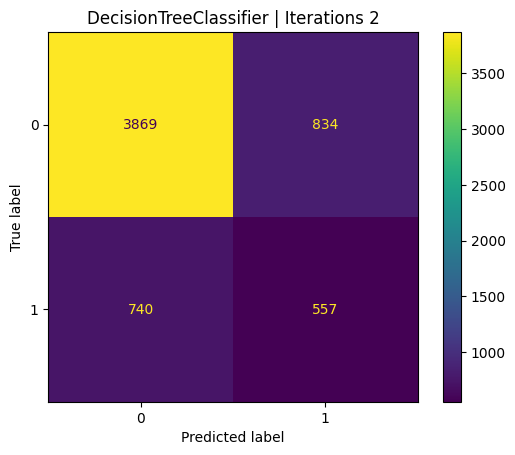

Iteration: 3
Model Training Time in Seconds: 0.38
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4609
           1       0.43      0.40      0.41      1391

    accuracy                           0.74      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.73      0.74      0.73      6000



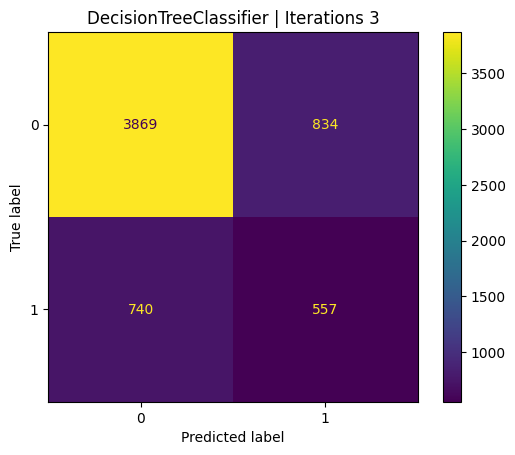

Iteration: 4
Model Training Time in Seconds: 0.38
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4609
           1       0.43      0.40      0.41      1391

    accuracy                           0.74      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.73      0.74      0.73      6000



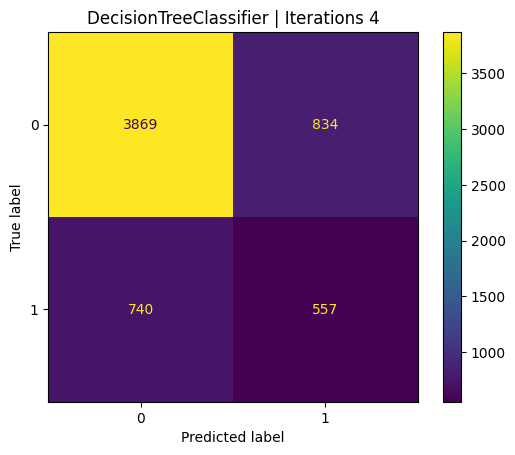

Iteration: 5
Model Training Time in Seconds: 0.40
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4609
           1       0.43      0.40      0.41      1391

    accuracy                           0.74      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.73      0.74      0.73      6000



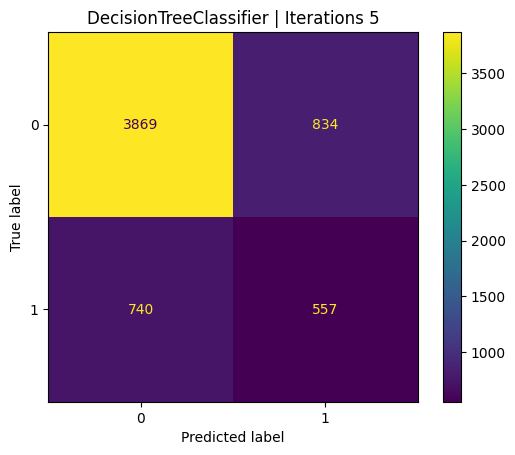

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import time
import numpy as np

# Define model
rf = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)

models = [rf, dt]

for model in models:
    print(f'----- {type(model).__name__} -----')
    for i in range(5):
        print(f'Iteration: {i+1}')
        # Train the model
        model_training_start_time = time.perf_counter()
        temp_model = model.fit(X_train, y_train)
        model_training_elapsed_time =  time.perf_counter() - model_training_start_time 
        print(f'Model Training Time in Seconds: {model_training_elapsed_time:.2f}')

        # Prediction
        model_prediction_start_time = time.perf_counter()
        y_pred = temp_model.predict(X_test)
        model_prediction_elapsed_time = time.perf_counter() - model_prediction_start_time
        print(f'Model Prediction Time in Seconds: {model_prediction_elapsed_time:.2f}')

        print(classification_report(y_pred, y_test))

        print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
        plt.title(f'{type(model).__name__} | Iterations {i+1}')
        plt.show()

### w/ feature selection

In [29]:
# feature is not include X1 (Amount of the given credit), X5 (age), X18-X23: Amount of previous payment
# and X18-X23 (Amount of previous payment)

# X = raw_df.iloc[:, 2:12] # w/ age
X = raw_df[['X2','X3','X4','X6','X7','X8','X9','X10','X11']]
y = raw_df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

----- RandomForestClassifier -----
Iteration: 1
Model Training Time in Seconds: 0.89
Model Prediction Time in Seconds: 0.07
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5202
           1       0.36      0.58      0.44       798

    accuracy                           0.81      6000
   macro avg       0.64      0.71      0.66      6000
weighted avg       0.85      0.81      0.82      6000



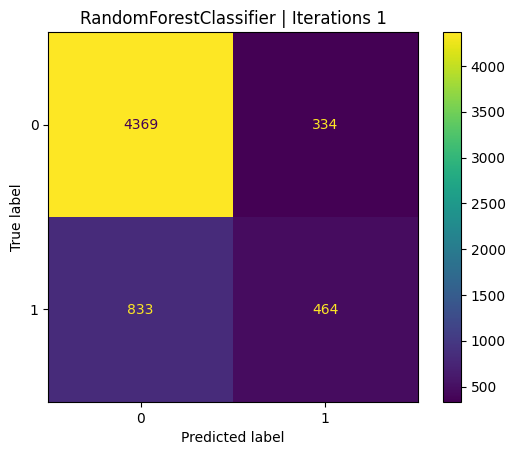

Iteration: 2
Model Training Time in Seconds: 0.90
Model Prediction Time in Seconds: 0.07
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5202
           1       0.36      0.58      0.44       798

    accuracy                           0.81      6000
   macro avg       0.64      0.71      0.66      6000
weighted avg       0.85      0.81      0.82      6000



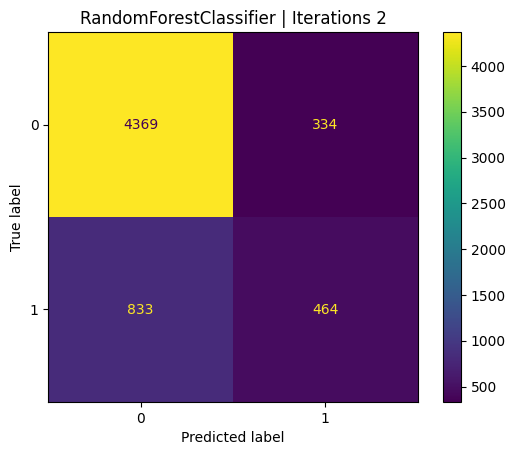

Iteration: 3
Model Training Time in Seconds: 0.89
Model Prediction Time in Seconds: 0.07
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5202
           1       0.36      0.58      0.44       798

    accuracy                           0.81      6000
   macro avg       0.64      0.71      0.66      6000
weighted avg       0.85      0.81      0.82      6000



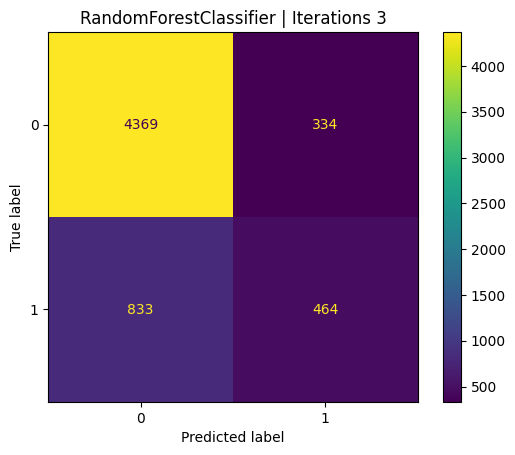

Iteration: 4
Model Training Time in Seconds: 0.89
Model Prediction Time in Seconds: 0.07
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5202
           1       0.36      0.58      0.44       798

    accuracy                           0.81      6000
   macro avg       0.64      0.71      0.66      6000
weighted avg       0.85      0.81      0.82      6000



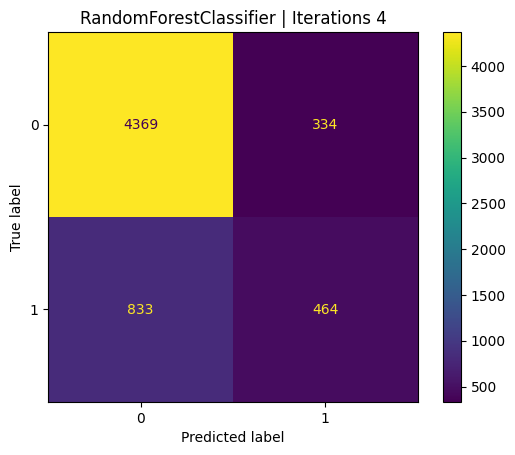

Iteration: 5
Model Training Time in Seconds: 0.89
Model Prediction Time in Seconds: 0.07
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5202
           1       0.36      0.58      0.44       798

    accuracy                           0.81      6000
   macro avg       0.64      0.71      0.66      6000
weighted avg       0.85      0.81      0.82      6000



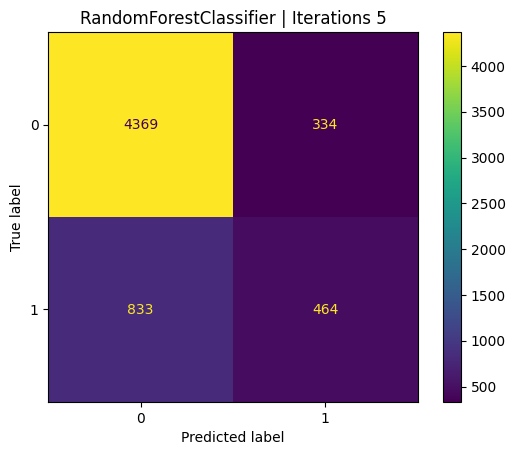

----- DecisionTreeClassifier -----
Iteration: 1
Model Training Time in Seconds: 0.03
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5231
           1       0.34      0.57      0.43       769

    accuracy                           0.80      6000
   macro avg       0.64      0.70      0.65      6000
weighted avg       0.85      0.80      0.82      6000



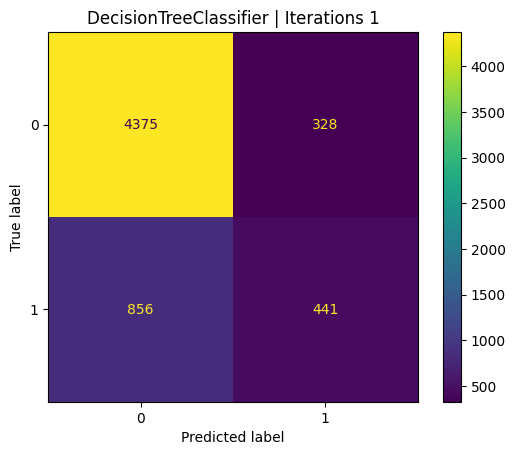

Iteration: 2
Model Training Time in Seconds: 0.03
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5231
           1       0.34      0.57      0.43       769

    accuracy                           0.80      6000
   macro avg       0.64      0.70      0.65      6000
weighted avg       0.85      0.80      0.82      6000



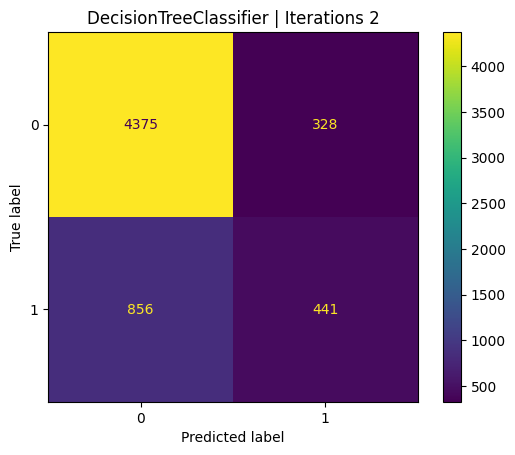

Iteration: 3
Model Training Time in Seconds: 0.03
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5231
           1       0.34      0.57      0.43       769

    accuracy                           0.80      6000
   macro avg       0.64      0.70      0.65      6000
weighted avg       0.85      0.80      0.82      6000



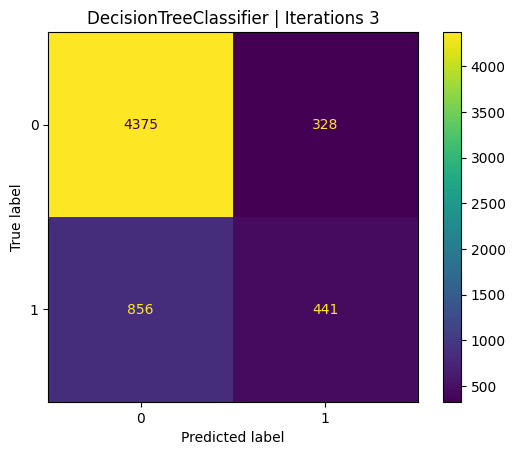

Iteration: 4
Model Training Time in Seconds: 0.03
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5231
           1       0.34      0.57      0.43       769

    accuracy                           0.80      6000
   macro avg       0.64      0.70      0.65      6000
weighted avg       0.85      0.80      0.82      6000



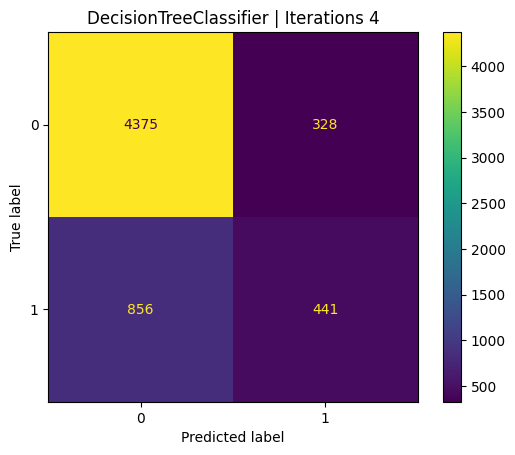

Iteration: 5
Model Training Time in Seconds: 0.03
Model Prediction Time in Seconds: 0.00
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5231
           1       0.34      0.57      0.43       769

    accuracy                           0.80      6000
   macro avg       0.64      0.70      0.65      6000
weighted avg       0.85      0.80      0.82      6000



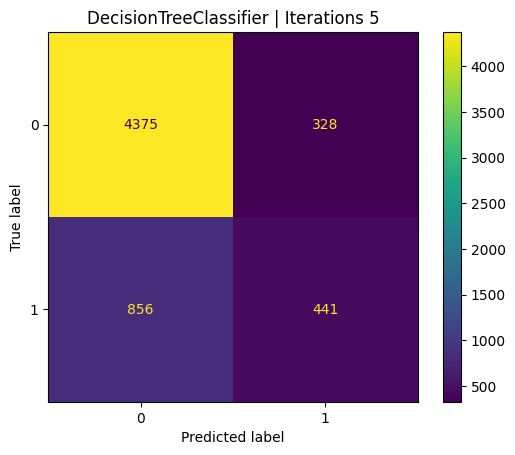

In [30]:
# Define model
rf = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)

models = [rf, dt]

for model in models:
    print(f'----- {type(model).__name__} -----')
    for i in range(5):
        print(f'Iteration: {i+1}')
        # Train the model
        model_training_start_time = time.perf_counter()
        temp_model = model.fit(X_train, y_train)
        model_training_elapsed_time =  time.perf_counter() - model_training_start_time 
        print(f'Model Training Time in Seconds: {model_training_elapsed_time:.2f}')

        # Prediction
        model_prediction_start_time = time.perf_counter()
        y_pred = temp_model.predict(X_test)
        model_prediction_elapsed_time = time.perf_counter() - model_prediction_start_time
        print(f'Model Prediction Time in Seconds: {model_prediction_elapsed_time:.2f}')

        print(classification_report(y_pred, y_test))

        print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
        plt.title(f'{type(model).__name__} | Iterations {i+1}')
        plt.show()

# Spark

## Import Dataset

In [31]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .getOrCreate()

# import DataSet that's already cleaning
raw_df = spark.read.csv('./data/credit_card_clients_cleaning.csv', header=True)
raw_df.show(5)

22/12/02 19:48:14 WARN Utils: Your hostname, puwaaAir.local resolves to a loopback address: 127.0.0.1; using 192.168.1.141 instead (on interface en0)
22/12/02 19:48:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/02 19:48:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+---+------+---+---+---+---+---+---+---+---+---+---+-----+-----+-----+-----+-----+-----+----+-----+-----+----+----+----+---+
| ID|    X1| X2| X3| X4| X5| X6| X7| X8| X9|X10|X11|  X12|  X13|  X14|  X15|  X16|  X17| X18|  X19|  X20| X21| X22| X23|  Y|
+---+------+---+---+---+---+---+---+---+---+---+---+-----+-----+-----+-----+-----+-----+----+-----+-----+----+----+----+---+
|  1| 20000|  1|  2|  1| 24|  2|  2| -1| -1| -2| -2| 3913| 3102|  689|    0|    0|    0|   0|  689|    0|   0|   0|   0|  1|
|  2|120000|  1|  2|  2| 26| -1|  2|  0|  0|  0|  2| 2682| 1725| 2682| 3272| 3455| 3261|   0| 1000| 1000|1000|   0|2000|  1|
|  3| 90000|  1|  2|  2| 34|  0|  0|  0|  0|  0|  0|29239|14027|13559|14331|14948|15549|1518| 1500| 1000|1000|1000|5000|  0|
|  4| 50000|  1|  2|  1| 37|  0|  0|  0|  0|  0|  0|46990|48233|49291|28314|28959|29547|2000| 2019| 1200|1100|1069|1000|  0|
|  5| 50000|  0|  2|  1| 57| -1|  0| -1|  0|  0|  0| 8617| 5670|35835|20940|19146|19131|2000|36681|10000|9000| 689| 679|  0|


## Data Preparation

In [32]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler

# change columns type 'str' to 'float' because VectorAssembler are not support to string type
raw_df = raw_df.select(*(col(c).cast("float").alias(c) for c in raw_df.columns))

# get columns name
numericCols = raw_df.drop('ID', 'Y').columns

# merge all feature columns to Vector
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")

va_df = assembler.transform(raw_df)

va_df.select(va_df.features, va_df.Y).show(5)

22/12/02 19:48:26 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+--------------------+---+
|            features|  Y|
+--------------------+---+
|[20000.0,1.0,2.0,...|1.0|
|[120000.0,1.0,2.0...|1.0|
|[90000.0,1.0,2.0,...|0.0|
|[50000.0,1.0,2.0,...|0.0|
|[50000.0,0.0,2.0,...|0.0|
+--------------------+---+
only showing top 5 rows



In [33]:
# train/test split
bs_train, bs_test = va_df.randomSplit([0.8, 0.2], seed=0)

train = bs_train.select(['features', 'Y'])
test = bs_test.select(['features', 'Y'])

## Models

### w/o feature selection

----- RandomForestClassifier -----
Iteration: 1


Model Training Time in Seconds: 9.60
Model Prediction Time in Seconds: 0.12
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      5374
         1.0       0.34      0.68      0.46       659

    accuracy                           0.82      6033
   macro avg       0.65      0.76      0.68      6033
weighted avg       0.89      0.82      0.85      6033



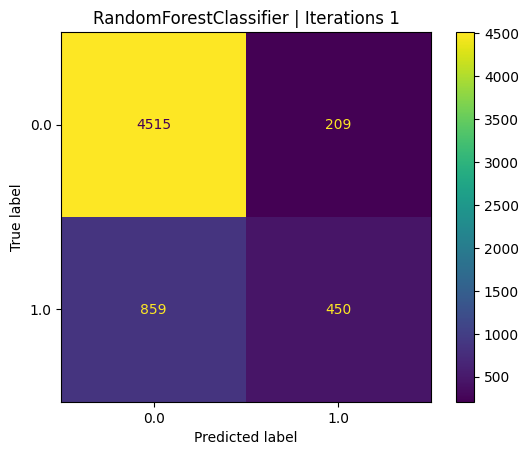

Iteration: 2
Model Training Time in Seconds: 4.09
Model Prediction Time in Seconds: 0.09
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      5374
         1.0       0.34      0.68      0.46       659

    accuracy                           0.82      6033
   macro avg       0.65      0.76      0.68      6033
weighted avg       0.89      0.82      0.85      6033



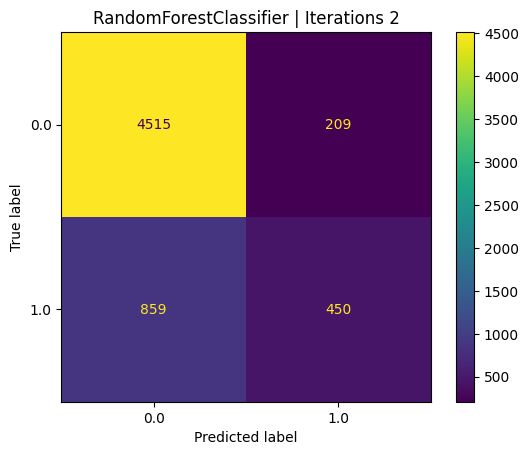

Iteration: 3


Model Training Time in Seconds: 3.19
Model Prediction Time in Seconds: 0.08
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      5374
         1.0       0.34      0.68      0.46       659

    accuracy                           0.82      6033
   macro avg       0.65      0.76      0.68      6033
weighted avg       0.89      0.82      0.85      6033



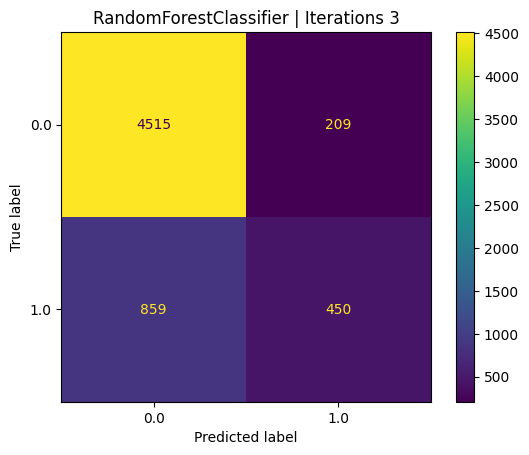

Iteration: 4
Model Training Time in Seconds: 3.37
Model Prediction Time in Seconds: 0.05
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      5374
         1.0       0.34      0.68      0.46       659

    accuracy                           0.82      6033
   macro avg       0.65      0.76      0.68      6033
weighted avg       0.89      0.82      0.85      6033



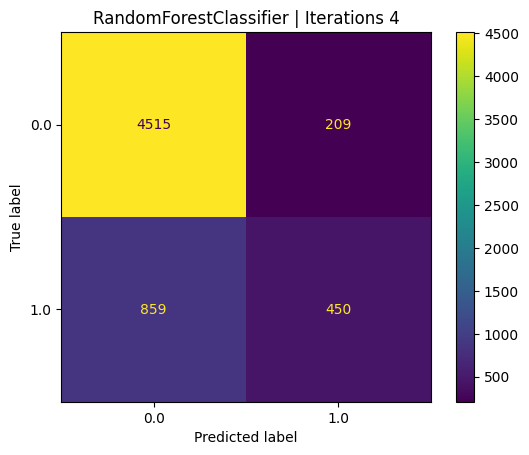

Iteration: 5
Model Training Time in Seconds: 3.02
Model Prediction Time in Seconds: 0.05
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      5374
         1.0       0.34      0.68      0.46       659

    accuracy                           0.82      6033
   macro avg       0.65      0.76      0.68      6033
weighted avg       0.89      0.82      0.85      6033



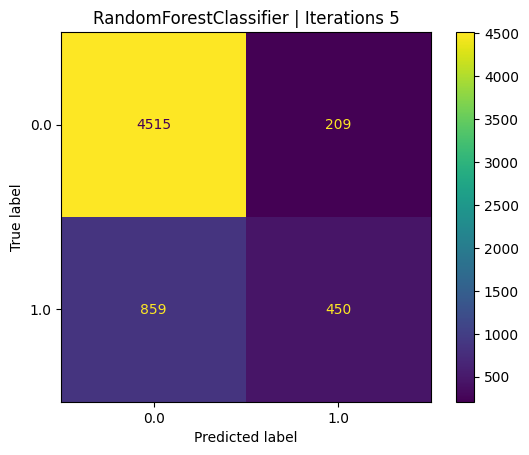

----- DecisionTreeClassifier -----
Iteration: 1
Model Training Time in Seconds: 2.43
Model Prediction Time in Seconds: 0.13
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      5297
         1.0       0.38      0.67      0.49       736

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.84      6033



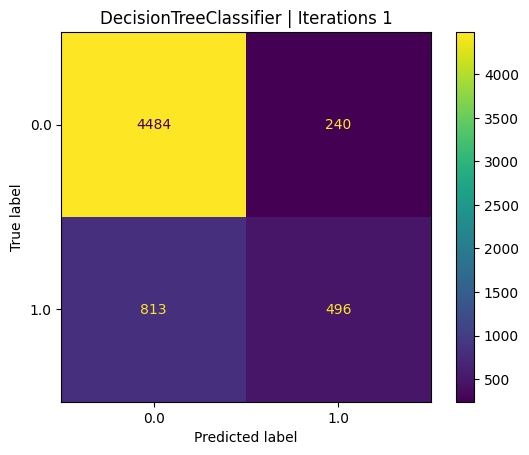

Iteration: 2
Model Training Time in Seconds: 2.22
Model Prediction Time in Seconds: 0.17
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      5297
         1.0       0.38      0.67      0.49       736

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.84      6033



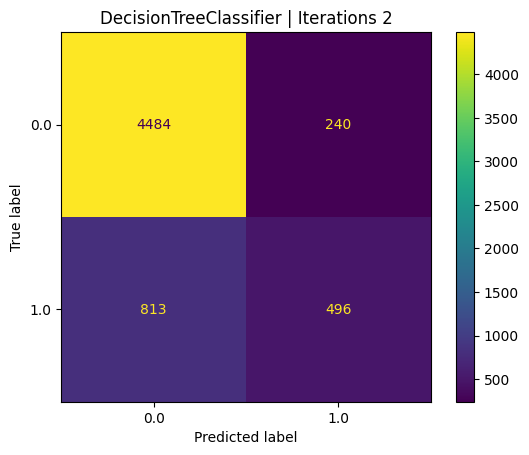

Iteration: 3
Model Training Time in Seconds: 1.91
Model Prediction Time in Seconds: 0.13
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      5297
         1.0       0.38      0.67      0.49       736

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.84      6033



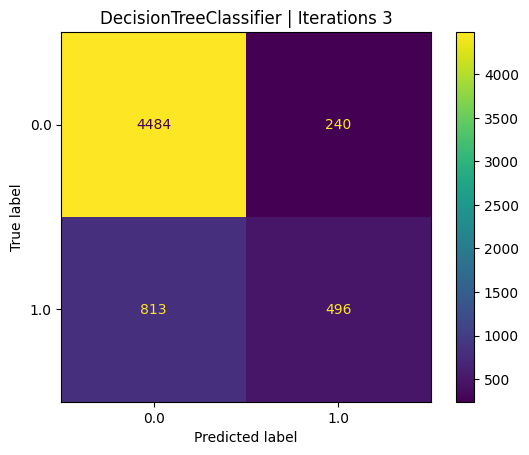

Iteration: 4
Model Training Time in Seconds: 1.89
Model Prediction Time in Seconds: 0.12
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      5297
         1.0       0.38      0.67      0.49       736

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.84      6033



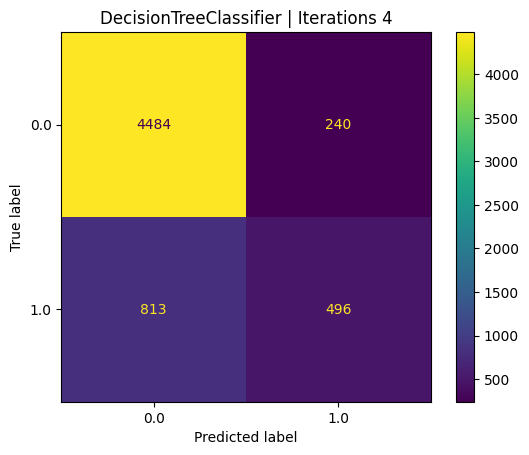

Iteration: 5
Model Training Time in Seconds: 2.02
Model Prediction Time in Seconds: 0.20
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.89      5297
         1.0       0.38      0.67      0.49       736

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.84      6033



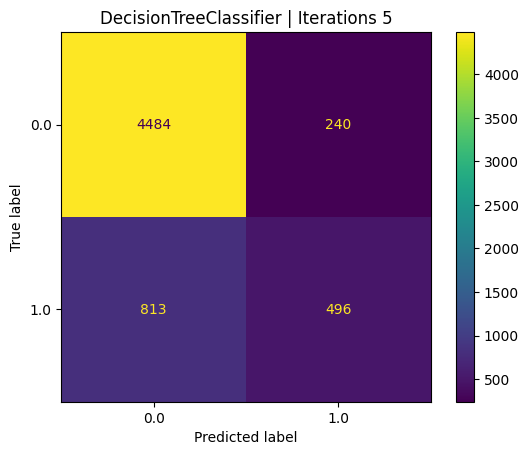

In [34]:
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier

# Define model
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Y')
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Y')

models = [rf, dt]

for model in models:
    print(f'----- {type(model).__name__} -----')
    for i in range(5):
        print(f'Iteration: {i+1}')
        # Train the model
        model_training_start_time = time.perf_counter()
        temp_model = model.fit(train)
        model_training_elapsed_time =  time.perf_counter() - model_training_start_time 
        print(f'Model Training Time in Seconds: {model_training_elapsed_time:.2f}')

        # Prediction
        model_prediction_start_time = time.perf_counter()
        pred = temp_model.transform(test)
        model_prediction_elapsed_time = time.perf_counter() - model_prediction_start_time
        print(f'Model Prediction Time in Seconds: {model_prediction_elapsed_time:.2f}')

        y_test = np.array(pred.select('Y').collect())
        y_pred = np.array(pred.select('prediction').collect())

        print(classification_report(y_pred, y_test))

        print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
        plt.title(f'{type(model).__name__} | Iterations {i+1}')
        plt.show()

### w/ feature selection

In [35]:
# get columns name
numericCols = raw_df.select(['X2','X3','X4','X6','X7','X8','X9','X10','X11']).columns

# merge all feature columns to Vector
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")

va_df = assembler.transform(raw_df)

# train/test split
bs_train, bs_test = va_df.randomSplit([0.8, 0.2], seed=0)

train = bs_train.select(['features', 'Y'])
test = bs_test.select(['features', 'Y'])

----- RandomForestClassifier -----
Iteration: 1
Model Training Time in Seconds: 3.81
Model Prediction Time in Seconds: 0.05
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.90      5334
         1.0       0.37      0.68      0.48       699

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.89      0.83      0.85      6033



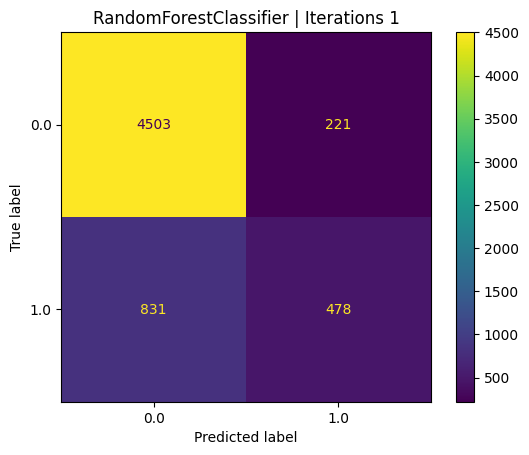

Iteration: 2
Model Training Time in Seconds: 2.95
Model Prediction Time in Seconds: 0.02
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.90      5334
         1.0       0.37      0.68      0.48       699

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.89      0.83      0.85      6033



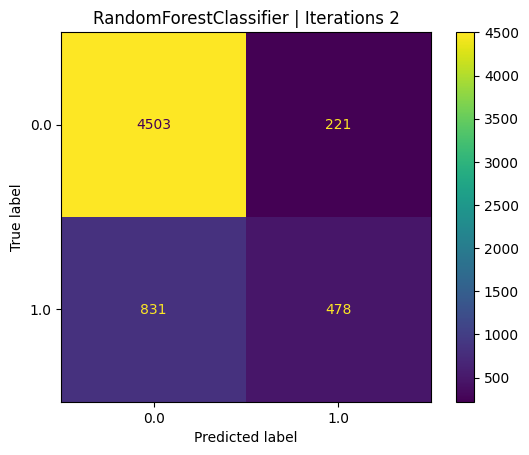

Iteration: 3
Model Training Time in Seconds: 2.75
Model Prediction Time in Seconds: 0.03
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.90      5334
         1.0       0.37      0.68      0.48       699

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.89      0.83      0.85      6033



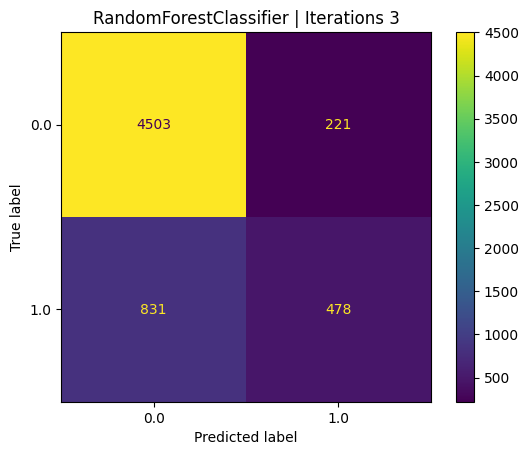

Iteration: 4
Model Training Time in Seconds: 2.88
Model Prediction Time in Seconds: 0.03
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.90      5334
         1.0       0.37      0.68      0.48       699

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.89      0.83      0.85      6033



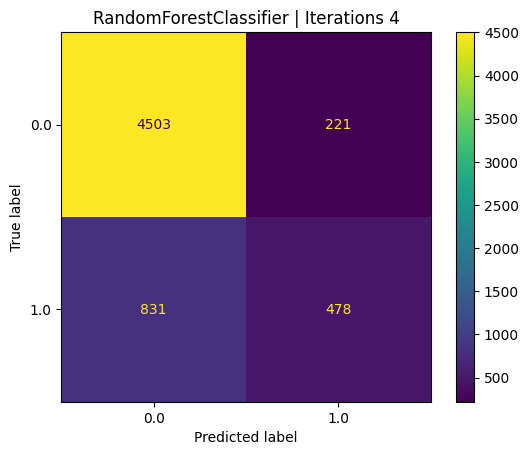

Iteration: 5
Model Training Time in Seconds: 2.98
Model Prediction Time in Seconds: 0.08
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.90      5334
         1.0       0.37      0.68      0.48       699

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.89      0.83      0.85      6033



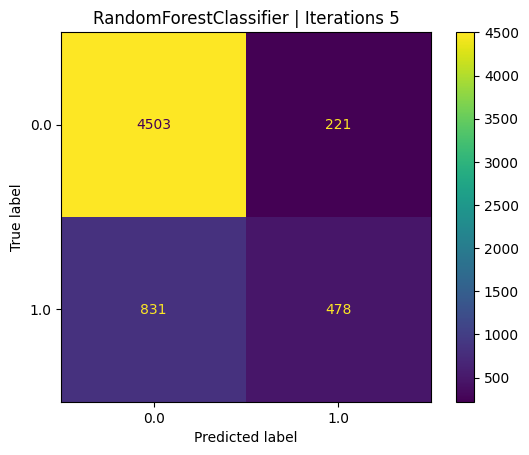

----- DecisionTreeClassifier -----
Iteration: 1
Model Training Time in Seconds: 1.83
Model Prediction Time in Seconds: 0.10
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      5318
         1.0       0.37      0.68      0.48       715

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.85      6033



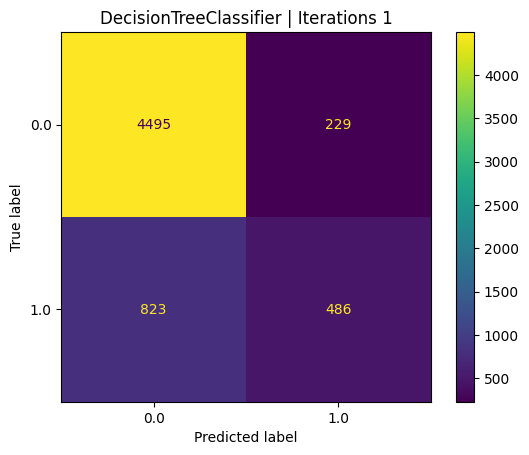

Iteration: 2
Model Training Time in Seconds: 1.87
Model Prediction Time in Seconds: 0.12
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      5318
         1.0       0.37      0.68      0.48       715

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.85      6033



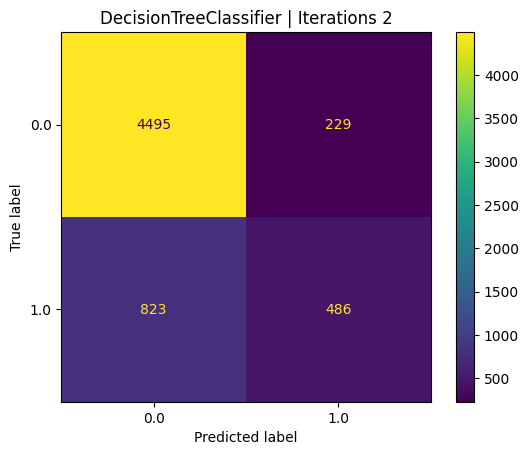

Iteration: 3
Model Training Time in Seconds: 1.99
Model Prediction Time in Seconds: 0.13
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      5318
         1.0       0.37      0.68      0.48       715

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.85      6033



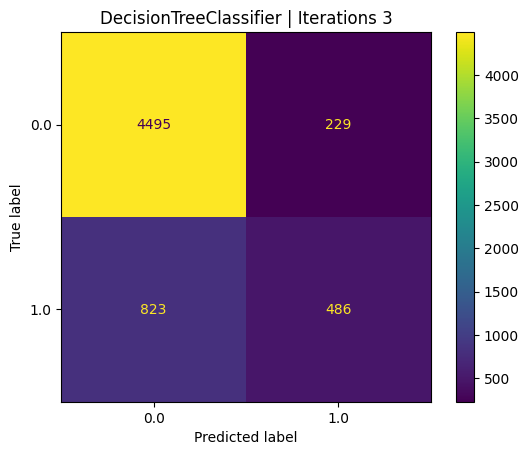

Iteration: 4
Model Training Time in Seconds: 1.49
Model Prediction Time in Seconds: 0.06
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      5318
         1.0       0.37      0.68      0.48       715

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.85      6033



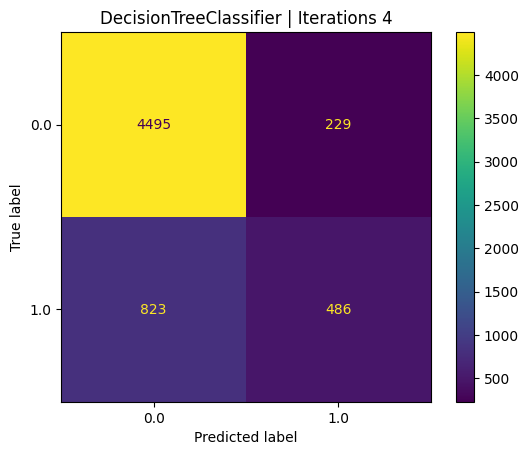

Iteration: 5
Model Training Time in Seconds: 1.68
Model Prediction Time in Seconds: 0.13
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      5318
         1.0       0.37      0.68      0.48       715

    accuracy                           0.83      6033
   macro avg       0.66      0.76      0.69      6033
weighted avg       0.88      0.83      0.85      6033



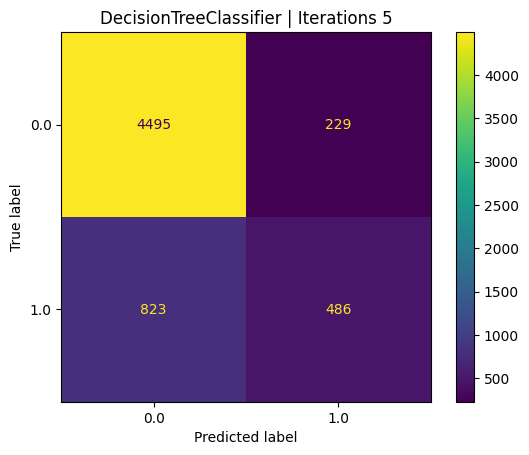

In [36]:
# Define model
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Y')
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Y')

models = [rf, dt]

for model in models:
    print(f'----- {type(model).__name__} -----')
    for i in range(5):
        print(f'Iteration: {i+1}')
        # Train the model
        model_training_start_time = time.perf_counter()
        temp_model = model.fit(train)
        model_training_elapsed_time =  time.perf_counter() - model_training_start_time 
        print(f'Model Training Time in Seconds: {model_training_elapsed_time:.2f}')

        # Prediction
        model_prediction_start_time = time.perf_counter()
        pred = temp_model.transform(test)
        model_prediction_elapsed_time = time.perf_counter() - model_prediction_start_time
        print(f'Model Prediction Time in Seconds: {model_prediction_elapsed_time:.2f}')

        y_test = np.array(pred.select('Y').collect())
        y_pred = np.array(pred.select('prediction').collect())

        print(classification_report(y_pred, y_test))

        print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
        plt.title(f'{type(model).__name__} | Iterations {i+1}')
        plt.show()